### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Loading the Dataset (Heart data)

In [4]:
heart_data_path = "Data/heart_data.csv"
heart_data = pd.read_csv(heart_data_path)

### Inspecting the Dataset

In [6]:
# Basic Information about the dataset
print("Basic Info \n")
heart_data.info()

# The First 10 rows of the data
print("\n The first 10 rows of the data \n")
print(f"{heart_data.head(10)} \n")

# Descriptive statistics about the data (Numerical)
print("Numerical Description of the data \n")
print(f"{heart_data.describe()} \n")

# Descriptive statistics about the data (Categorical)
print("Categorical Description of the data \n")
heart_data.describe(include="O")

Basic Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB

 The first 10 rows of the data 

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  

,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


### Data Cleaning

In [8]:
#1 Checking for misrepresented data in the columns

# Viewing unique values in object-type columns for potential conversion or inspection
for column in heart_data.select_dtypes(include=['object']).columns:
    unique_values = heart_data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")



Unique values in 'ca': ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in 'thal': ['6.0' '3.0' '7.0' '?']


In [9]:
# Replacing '?' with NaN in the 'ca' and 'thal' columns

heart_data['ca'] = heart_data['ca'].replace('?', np.NaN).astype(float)
heart_data['thal'] = heart_data['thal'].replace('?', np.NaN).astype(float)

In [10]:
#2 Checking for missing values
print(f"\nMissing Values: \n\n{heart_data.isnull().sum()}\n")



Missing Values: 

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
heart_disease    0
dtype: int64



In [11]:
# Repalce missing values for 'ca' and 'thal' with the mode
heart_data["ca"] = heart_data["ca"].fillna(heart_data["ca"].mode()[0])
heart_data["thal"] = heart_data["thal"].fillna(heart_data["thal"].mode()[0])

In [12]:
print(f"\nMissing Values: \n\n{heart_data.isnull().sum()}\n")


Missing Values: 

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64



In [13]:
#3 Checking for duplicates
print(f"Duplicates: \n\n{heart_data.duplicated().sum()}")

Duplicates: 

0


### Univariant Analysis


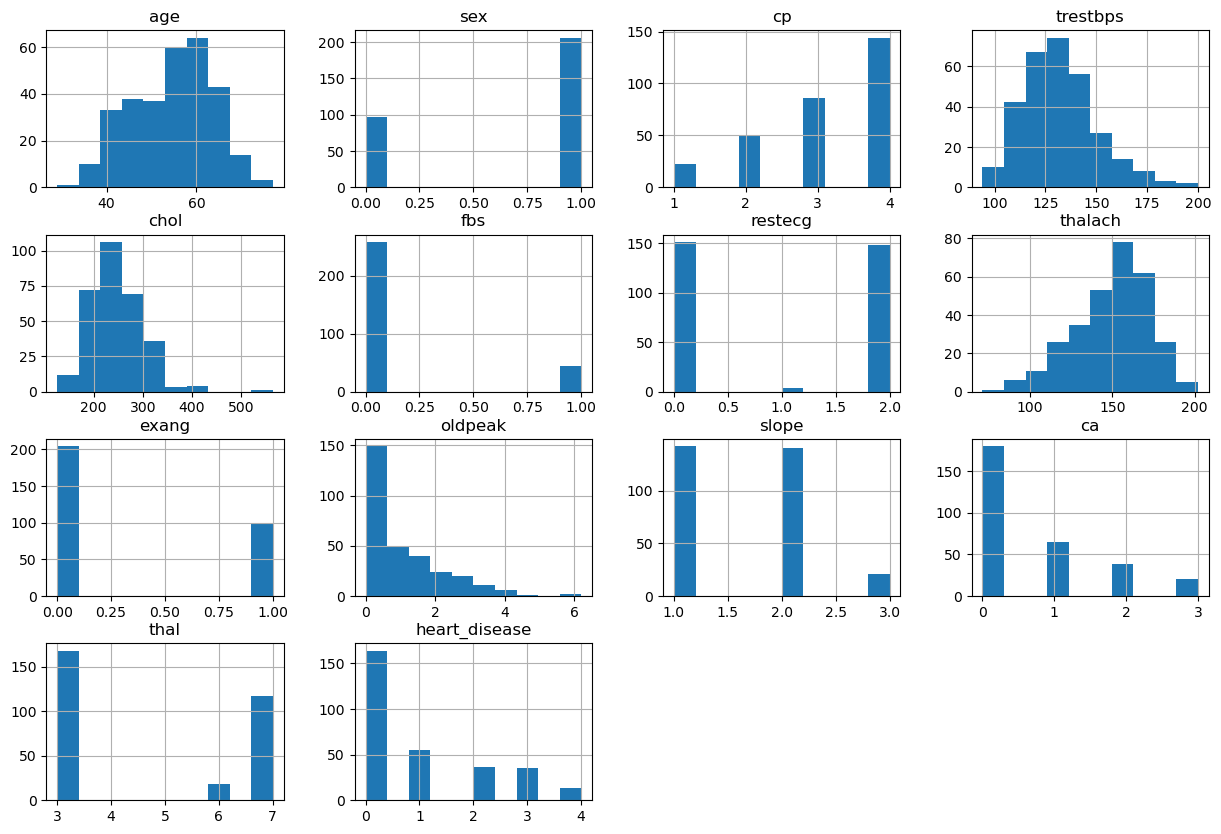

In [15]:
# Visualizing the distributions using histogram
heart_data.hist(figsize=(15,10));

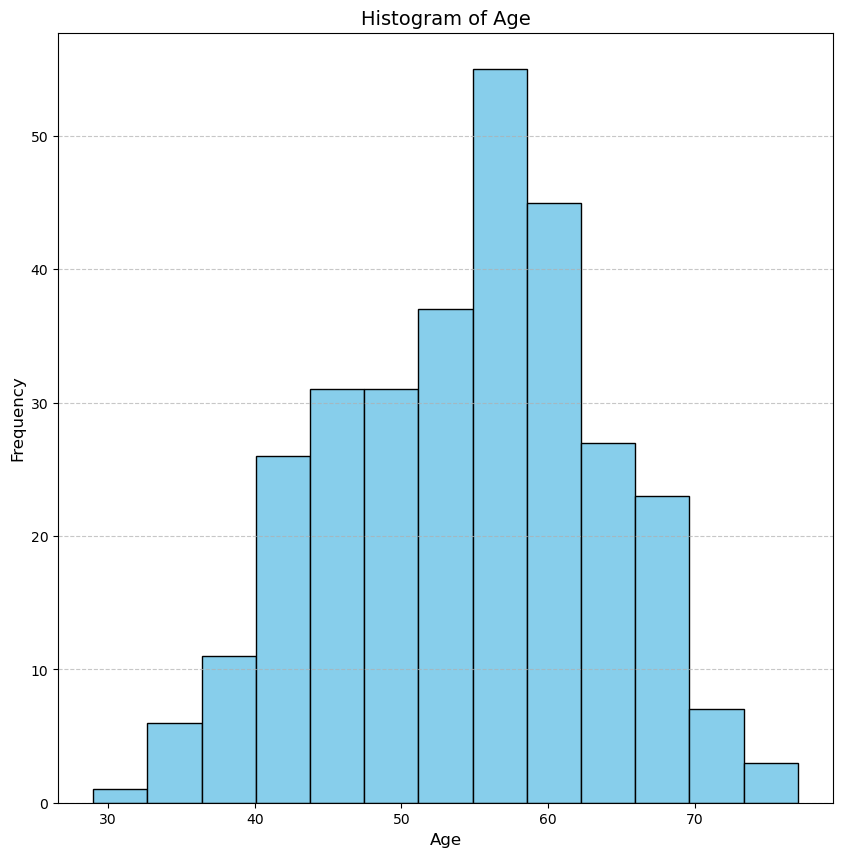

In [33]:
# Distribution of Age (Histogram)
plt.figure(figsize=(10, 10))
plt.hist(heart_data["age"], bins='auto', color='skyblue', edgecolor='black')
plt.title('Histogram of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

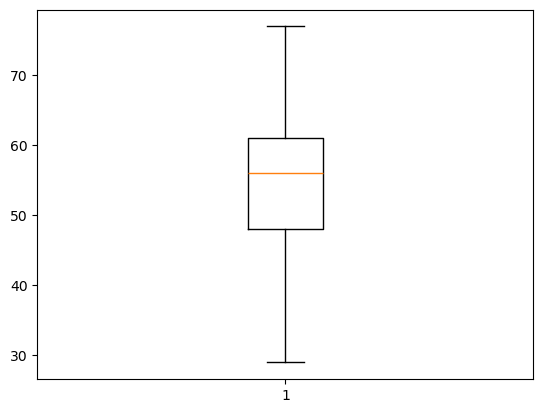

In [41]:
# Distribution of age (boxplot)
plt.boxplot(heart_data["age"])
plt.show()

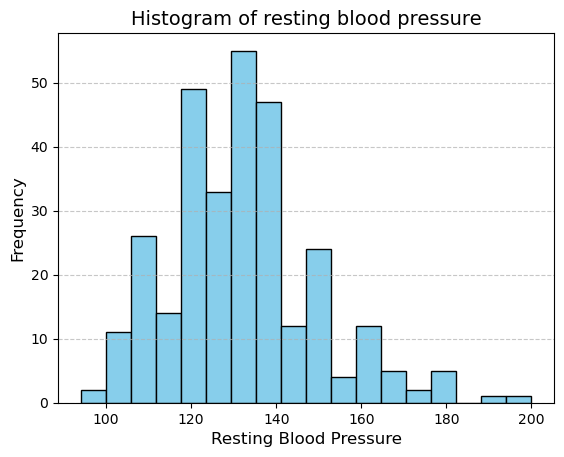

In [45]:
# Distribution of trestbps (Histogram)
plt.hist(heart_data["trestbps"],  bins='auto', color='skyblue', edgecolor='black')
plt.title('Histogram of resting blood pressure', fontsize=14)
plt.xlabel('Resting Blood Pressure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

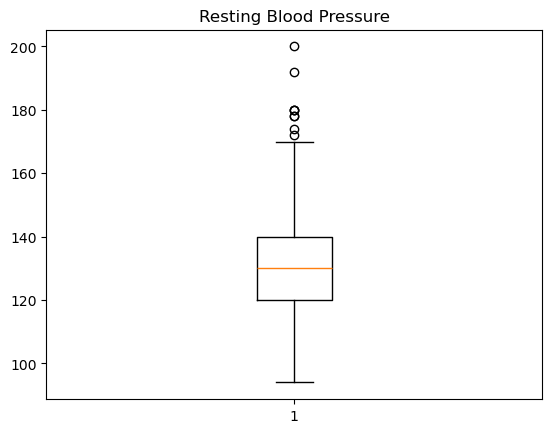

In [47]:
# Distribution of trestbps (boxplot)
plt.boxplot(heart_data["trestbps"])
plt.title("Resting Blood Pressure")
plt.show()

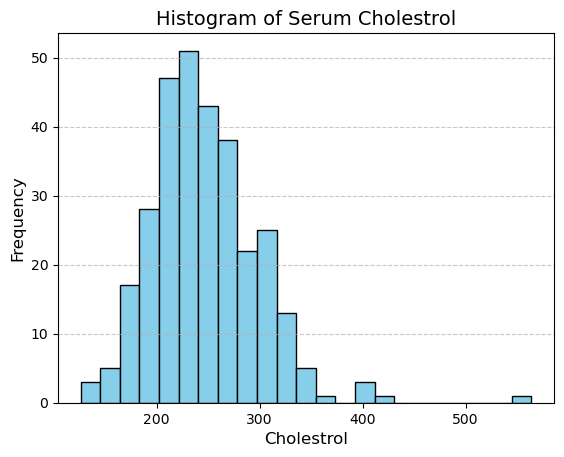

In [51]:
# Distribution of chol (Histogram)
plt.hist(heart_data["chol"], bins='auto', color='skyblue', edgecolor='black' )
plt.title('Histogram of Serum Cholestrol', fontsize=14)
plt.xlabel('Cholestrol', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

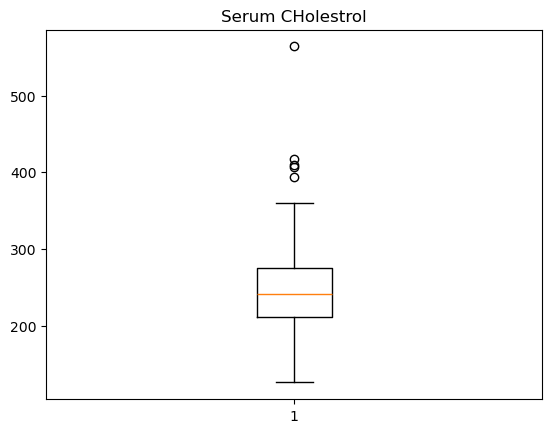

In [53]:
# Distribution of chol (boxplot)
plt.boxplot(heart_data["chol"])
plt.title("Serum CHolestrol")
plt.show()